In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cluster.csv')

In [3]:
data.head()

,G_ID,TEAM,TB_SC,WLS,cluster_team,hit_f1,hit_f2,hit_f3,pit_f1,pit_f2,pit_f3,pit_f4
0,20160401HHLG0,HH,T,L,0,3.246649,-0.672442,0.381691,3.257575,1.922055,-0.487703,0.570372
1,20160402HHLG0,HH,T,L,0,1.916625,-1.703314,0.501447,-0.109634,2.675800,-1.352436,0.990402
2,20160408HHNC0,HH,T,L,0,-0.015081,0.896037,-0.576470,-0.059819,4.637674,-0.527072,0.122953
3,20160409HHNC0,HH,T,L,0,0.673044,0.726039,-1.306066,-0.556478,3.412919,0.158875,1.391084
4,20160410HHNC0,HH,T,W,0,1.162881,0.291856,-0.617290,0.533719,3.826195,0.139266,-1.126466


## EDA

In [4]:
data0 = data[data['cluster_team']==0]
data2 = data[data['cluster_team']==2]

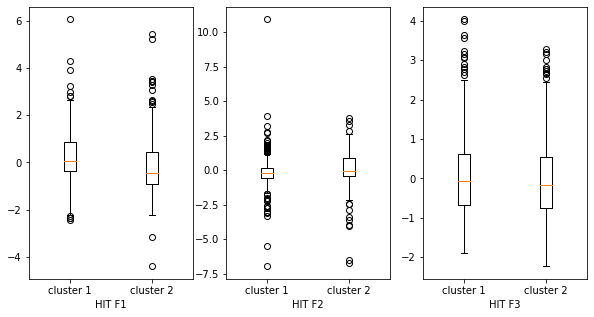

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].boxplot([data0['hit_f1'], data2['hit_f1']])
ax[0].set_xticklabels(['cluster 1', 'cluster 2'])
ax[0].set_xlabel('HIT F1')
ax[1].boxplot([data0['hit_f2'], data2['hit_f2']])
ax[1].set_xticklabels(['cluster 1', 'cluster 2'])
ax[1].set_xlabel('HIT F2')
ax[2].boxplot([data0['hit_f3'], data2['hit_f3']])
ax[2].set_xticklabels(['cluster 1', 'cluster 2'])
ax[2].set_xlabel('HIT F3')
plt.show()

In [6]:
from mpl_toolkits import mplot3d

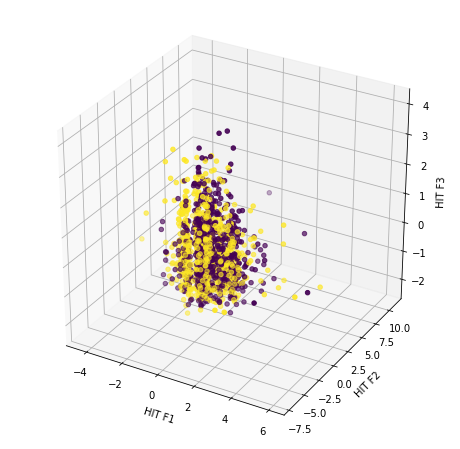

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(data['hit_f1'], data['hit_f2'], data['hit_f3'], c=data['cluster_team'])
ax.set_xlabel('HIT F1')
ax.set_ylabel('HIT F2')
ax.set_zlabel('HIT F3')
plt.show()

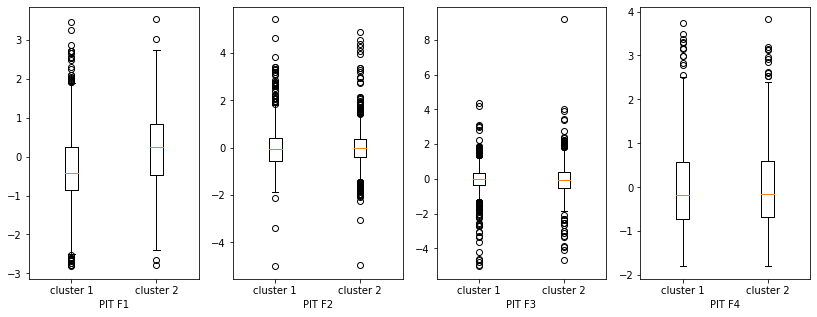

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(14, 5))
ax[0].boxplot([data0['pit_f1'], data2['pit_f1']])
ax[0].set_xticklabels(['cluster 1', 'cluster 2'])
ax[0].set_xlabel('PIT F1')
ax[1].boxplot([data0['pit_f2'], data2['pit_f2']])
ax[1].set_xticklabels(['cluster 1', 'cluster 2'])
ax[1].set_xlabel('PIT F2')
ax[2].boxplot([data0['pit_f3'], data2['pit_f3']])
ax[2].set_xticklabels(['cluster 1', 'cluster 2'])
ax[2].set_xlabel('PIT F3')
ax[3].boxplot([data0['pit_f4'], data2['pit_f4']])
ax[3].set_xticklabels(['cluster 1', 'cluster 2'])
ax[3].set_xlabel('PIT F4')
plt.show()

## Schedule Table Crawling

**September**

In [9]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.headless = True
driver = webdriver.Chrome('/Applications/chromedriver', options=options)

In [10]:
driver.get('https://www.koreabaseball.com/Schedule/Schedule.aspx')
driver.find_element_by_id('ddlMonth').send_keys('09')

table = driver.find_element_by_xpath('//*[@id="tblSchedule"]/tbody')
schedule = table.text

In [11]:
a = []

In [12]:
for i in range(len(schedule.split('\n'))):
    if len(schedule.split('\n')[i].split(' ')) == 5:
        a.append(i)

In [13]:
b = []

In [14]:
for i in range(len(schedule.split('\n'))):
    b.append(schedule.split('\n')[i].split(' '))

In [15]:
for i in a:
    del b[i][0]

In [16]:
schedule_sep = pd.DataFrame(b).drop([3], axis=1)
schedule_sep.columns = ['time', 'game', 'stadium']
schedule_sep['date'] = None
schedule_sep = schedule_sep[['date', 'time', 'game', 'stadium']]

In [17]:
a.append(len(schedule.split('\n')))

In [18]:
for i in range(len(a)-1):
    schedule_sep.iloc[a[i]:a[i+1], 0] = schedule.split('\n')[a[i]].split(' ')[0]

In [19]:
schedule_sep

,date,time,game,stadium
0,09.01(화),18:30,한화vs두산,잠실
1,09.01(화),18:30,LGvsSK,문학
2,09.01(화),18:30,롯데vsKT,수원
3,09.01(화),18:30,삼성vsKIA,광주
4,09.01(화),18:30,NCvs키움,고척
...,...,...,...,...
130,09.30(수),14:00,롯데vsLG,잠실
131,09.30(수),14:00,KTvs삼성,대구
132,09.30(수),14:00,SKvsNC,창원
133,09.30(수),14:00,KIAvs키움,고척


**October**

In [20]:
driver.get('https://www.koreabaseball.com/Schedule/Schedule.aspx')
driver.find_element_by_id('ddlMonth').send_keys('10')

table = driver.find_element_by_xpath('//*[@id="tblSchedule"]/tbody')
schedule = table.text

In [21]:
a = []

In [22]:
for i in range(len(schedule.split('\n'))):
    if len(schedule.split('\n')[i].split(' ')) == 5:
        a.append(i)

In [23]:
b = []

In [24]:
for i in range(len(schedule.split('\n'))):
    b.append(schedule.split('\n')[i].split(' '))

In [25]:
for i in a:
    del b[i][0]

In [26]:
schedule_oct = pd.DataFrame(b).drop([3], axis=1)
schedule_oct.columns = ['time', 'game', 'stadium']
schedule_oct['date'] = None
schedule_oct = schedule_oct[['date', 'time', 'game', 'stadium']]

In [27]:
a.append(len(schedule.split('\n')))

In [28]:
for i in range(len(a)-1):
    schedule_oct.iloc[a[i]:a[i+1], 0] = schedule.split('\n')[a[i]].split(' ')[0]

In [29]:
schedule_oct

,date,time,game,stadium
0,10.01(목),14:00,롯데vsLG,잠실
1,10.01(목),14:00,KTvs삼성,대구
2,10.01(목),14:00,SKvsNC,창원
3,10.01(목),14:00,KIAvs키움,고척
4,10.01(목),14:00,두산vs한화,대전
...,...,...,...,...
79,10.18(일),14:00,KIAvsLG,잠실
80,10.18(일),14:00,KTvsSK,문학
81,10.18(일),14:00,롯데vsNC,창원
82,10.18(일),14:00,두산vs키움,고척


In [30]:
schedule = pd.concat([schedule_sep, schedule_oct])

In [31]:
schedule = schedule.iloc[125:,]
schedule = schedule.reset_index(drop=True)

In [32]:
schedule

,date,time,game,stadium
0,09.29(화),18:30,롯데vsLG,잠실
1,09.29(화),18:30,KTvs삼성,대구
2,09.29(화),18:30,SKvsNC,창원
3,09.29(화),18:30,KIAvs키움,고척
4,09.29(화),18:30,두산vs한화,대전
...,...,...,...,...
89,10.18(일),14:00,KIAvsLG,잠실
90,10.18(일),14:00,KTvsSK,문학
91,10.18(일),14:00,롯데vsNC,창원
92,10.18(일),14:00,두산vs키움,고척


In [33]:
schedule.to_csv('schedule.csv', index=False)